## Transfer Learning Xception using Keras

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [3]:
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [4]:
xception = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

83689472/83683744 [==============================] - 16s 0us/step


In [7]:
for layer in xception.layers:
    layer.trainable = False

In [8]:
folders = glob('Datasets/train/*')

In [11]:
x = Flatten()(xception.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=xception.input, outputs=prediction)

In [13]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [14]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [17]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [18]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\tarun\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
574/574 [==============================] - 241s 410ms/step - loss: 2.7321 - accuracy: 0.6470 - val_loss: 2.4823 - val_accuracy: 0.7788
Epoch 2/10
574/574 [==============================] - 233s 405ms/step - loss: 1.8279 - accuracy: 0.8106 - val_loss: 1.9213 - val_accuracy: 0.8203
Epoch 3/10
574/574 [==============================] - 240s 418ms/step - loss: 1.6872 - accuracy: 0.8450 - val_loss: 1.8492 - val_accuracy: 0.8458
Epoch 4/10
574/574 [==============================] - 236s 410ms/step - loss: 1.3287 - accuracy: 0.8742 - val_loss: 2.0372 - val_accuracy: 0.8451
Epoch 5/10
574/574 [==============================] - 259s 452ms/step - loss: 1.3650 - accuracy: 0.8818 - val_loss: 1.8855 - val_accuracy: 0.8611
Epoch 6/10
574/574 [==============================] - 235s 409ms/step - loss: 1.4661 - accuracy: 0.8871 - val_loss: 2.2364 - val_accuracy: 0.8541
Epoch 7/10
574/574 [==============================] - 237s 413ms/step - loss: 1.2993 - accuracy: 0.8949 - val_loss: 2.1432 -

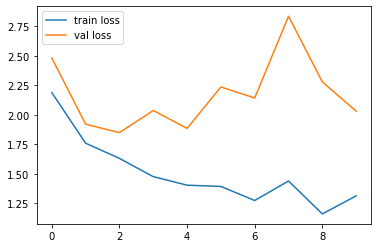

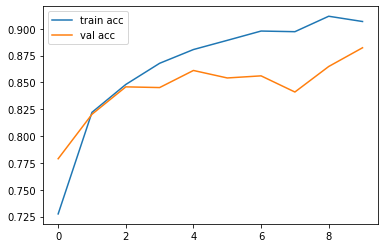

<Figure size 432x288 with 0 Axes>

In [20]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [28]:
model.save('model_xception.h5')

In [22]:
y_pred = model.predict(test_set)

In [23]:
y_pred

array([[1.0000000e+00, 1.1335073e-15, 3.4523980e-26, ..., 2.2767390e-34,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 6.6071866e-13, 0.0000000e+00, ..., 0.0000000e+00,
        3.9982014e-31, 0.0000000e+00],
       ...,
       [1.2123977e-38, 8.8918055e-13, 5.1154765e-23, ..., 9.5363731e-27,
        1.3886484e-30, 0.0000000e+00],
       [0.0000000e+00, 5.5950749e-28, 2.1091602e-27, ..., 0.0000000e+00,
        2.6951657e-36, 7.9233774e-28],
       [0.0000000e+00, 1.0000000e+00, 6.9020288e-24, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [24]:
y_pred = np.argmax(y_pred, axis=1)

In [25]:
y_pred

array([0, 7, 4, ..., 4, 3, 1], dtype=int64)